In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df1 = pd.read_csv('/content/winequality-red.csv', sep=';')
df2 = pd.read_csv('/content/winequality-white.csv', sep=';')
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#assigning red_wine 0 and white_wine 1
df1['wine_type'] = 0
df2['wine_type'] = 1

In [ ]:
merged_df=df1.append(df2)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


<ipython-input-11-c4c55238ba4a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df=df1.append(df2)


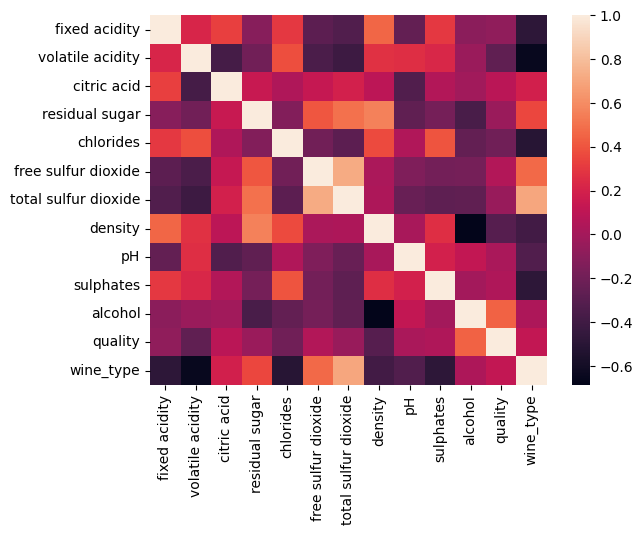

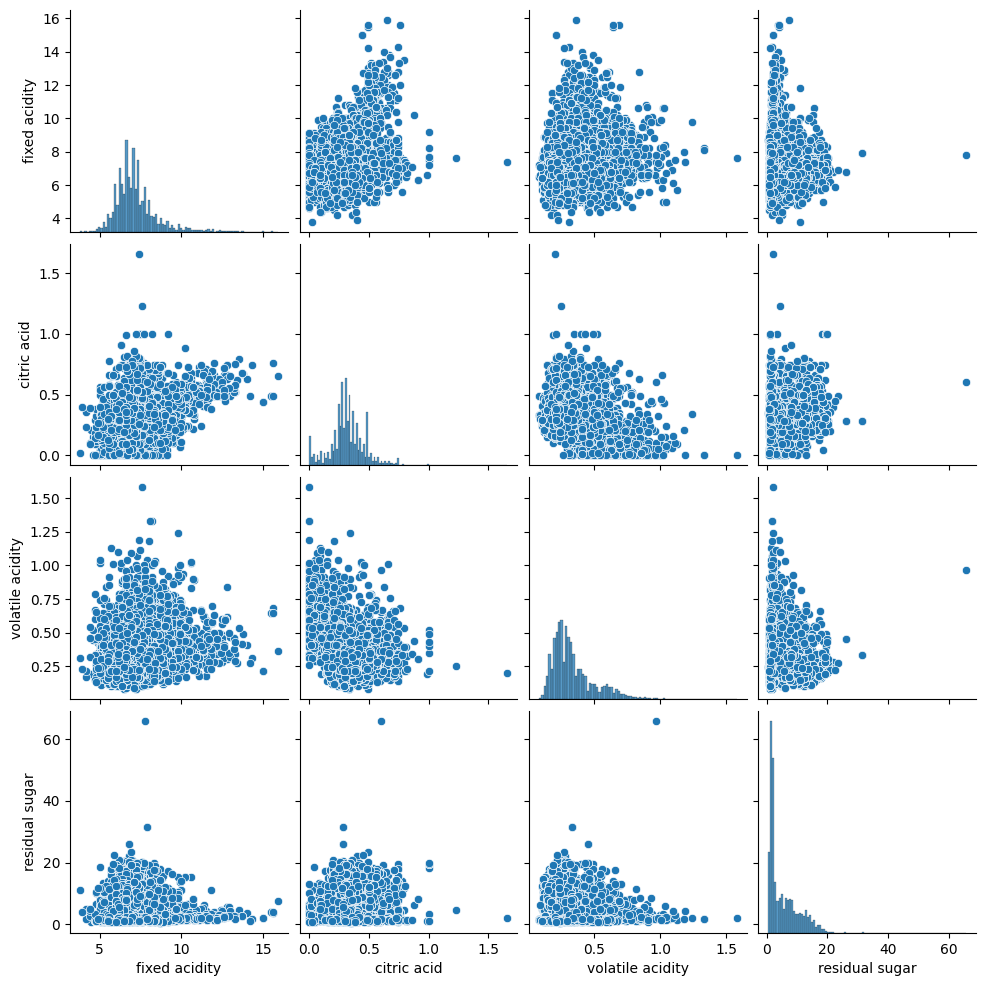

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(merged_df.corr(numeric_only=True))
plt.show()
sns.pairplot(merged_df, vars=['fixed acidity', 'citric acid', 'volatile acidity', 'residual sugar'])
plt.show()

In [ ]:
#check if there is any null values or not
merged_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [ ]:
X = merged_df.drop('wine_type', axis=1)
y = merged_df['wine_type']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
#normalizing using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x= scaler.fit_transform(X)
scaled_x[:5]

array([[0.29752066, 0.41333333, 0.        , 0.01993865, 0.11129568,
        0.03472222, 0.06451613, 0.20609215, 0.6124031 , 0.19101124,
        0.20289855, 0.33333333],
       [0.33057851, 0.53333333, 0.        , 0.03067485, 0.14784053,
        0.08333333, 0.140553  , 0.18681319, 0.37209302, 0.25842697,
        0.26086957, 0.33333333],
       [0.33057851, 0.45333333, 0.02409639, 0.02607362, 0.13787375,
        0.04861111, 0.11059908, 0.19066898, 0.41860465, 0.24157303,
        0.26086957, 0.33333333],
       [0.61157025, 0.13333333, 0.3373494 , 0.01993865, 0.10963455,
        0.05555556, 0.12442396, 0.20994795, 0.34108527, 0.20224719,
        0.26086957, 0.5       ],
       [0.29752066, 0.41333333, 0.        , 0.01993865, 0.11129568,
        0.03472222, 0.06451613, 0.20609215, 0.6124031 , 0.19101124,
        0.20289855, 0.33333333]])

In [ ]:
#train test validation split : 80%, 10%, 10%
X_train, X_rem, y_train, y_rem = train_test_split(scaled_x,y, test_size=0.2,
                                                  random_state=0,
                                                  shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem,
                                                   test_size=0.5,
                                                  random_state=0,
                                                   shuffle=True)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(5197, 12)
(5197,)
(650, 12)
(650,)
(650, 12)
(650,)


(None, None)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
#Model 1: Simple Feedforward Neural Network
model = Sequential([
    Dense(4, activation='relu'), # first layer
    Dense(1, activation='sigmoid') # output layer
])

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
163/163 [==============================] - 2s 3ms/step - loss: 0.6129 - accuracy: 0.7483 - val_loss: 0.5032 - val_accuracy: 0.7662
Epoch 2/80
163/163 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7614 - val_loss: 0.4014 - val_accuracy: 0.8031
Epoch 3/80
163/163 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8414 - val_loss: 0.3080 - val_accuracy: 0.9000
Epoch 4/80
163/163 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.9265 - val_loss: 0.2350 - val_accuracy: 0.9554
Epoch 5/80
163/163 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9629 - val_loss: 0.1829 - val_accuracy: 0.9754
Epoch 6/80
163/163 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9721 - val_loss: 0.1474 - val_accuracy: 0.9815
Epoch 7/80
163/163 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9761 - val_loss: 0.1221 - val_accuracy: 0.9846
Epoch 

In [ ]:
y_preds = model.predict(X_test)

21/21 [==============================] - 0s 1ms/step


In [ ]:
corr = 0

for i in range(len(y_test)):
  pred = 1 if y_preds[i] >= 0.5 else 0

  if pred == y_test.iloc[i]:
    corr += 1


model_accuracy={}
model_accuracy[0]=corr / len(y_test)
print(model_accuracy[0])

0.9892307692307692


21/21 [==============================] - 0s 2ms/step


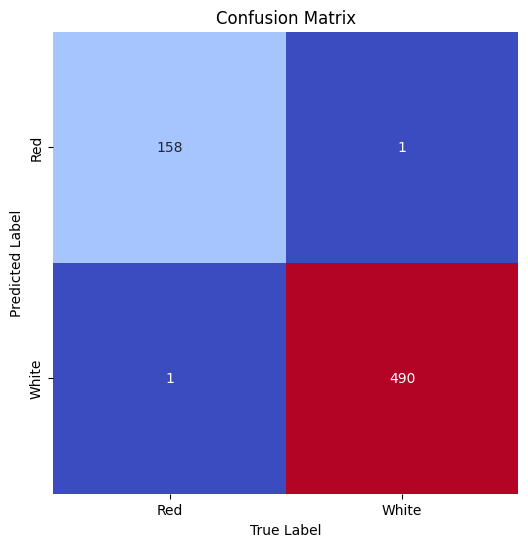

In [ ]:

# Get the predicted probabilities
y_preds = model.predict(X_test)

# Reshape the  probs to match the shape of y_test
y_preds = np.squeeze(y_preds)  # Remove unnecessary dimensions
y_preds = np.round(y_preds).astype(int)

#confusion matrix
confusion_matrix = np.zeros((2, 2))
for pred, true in zip(y_preds, y_test):
    confusion_matrix[pred][true] += 1

# heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.xticks([0.5, 1.5], labels=['Red', 'White'])
plt.yticks([0.5, 1.5], labels=['Red', 'White'])
plt.show()

In [ ]:
model2 = Sequential([
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
model2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
163/163 [==============================] - 3s 8ms/step - loss: 0.1828 - accuracy: 0.9259 - val_loss: 0.0365 - val_accuracy: 0.9862
Epoch 2/30
163/163 [==============================] - 1s 4ms/step - loss: 0.0523 - accuracy: 0.9840 - val_loss: 0.0242 - val_accuracy: 0.9954
Epoch 3/30
163/163 [==============================] - 1s 4ms/step - loss: 0.0418 - accuracy: 0.9892 - val_loss: 0.0341 - val_accuracy: 0.9892
Epoch 4/30
163/163 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9933 - val_loss: 0.0264 - val_accuracy: 0.9938
Epoch 5/30
163/163 [==============================] - 1s 5ms/step - loss: 0.0349 - accuracy: 0.9913 - val_loss: 0.0279 - val_accuracy: 0.9892
Epoch 6/30
163/163 [==============================] - 1s 5ms/step - loss: 0.0332 - accuracy: 0.9925 - val_loss: 0.0275 - val_accuracy: 0.9923
Epoch 7/30
163/163 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9923 - val_loss: 0.0285 - val_accuracy: 0.9954
Epoch 

In [ ]:
y_preds2 = model2.predict(X_test)

21/21 [==============================] - 0s 1ms/step


In [ ]:
corr = 0
model_accuracy[1]=0
for i in range(len(y_test)):
  pred = 1 if y_preds2[i] >= 0.5 else 0

  if pred == y_test.iloc[i]:
    corr += 1

model_accuracy[1]=corr / len(y_test)
print(model_accuracy[1])

0.9969230769230769


21/21 [==============================] - 1s 7ms/step


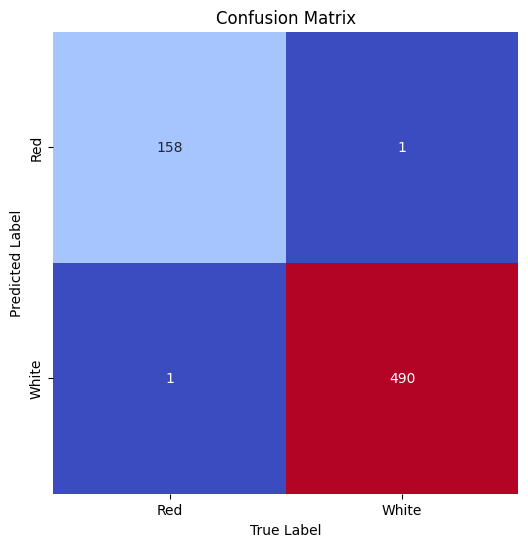

In [ ]:

y_preds2 = model2.predict(X_test)


y_preds2 = np.squeeze(y_preds2)
y_preds2 = np.round(y_preds2).astype(int)


confusion_matrix = np.zeros((2, 2))
for pred, true in zip(y_preds2, y_test):
    confusion_matrix[pred][true] += 1


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.xticks([0.5, 1.5], labels=['Red', 'White'])
plt.yticks([0.5, 1.5], labels=['Red', 'White'])
plt.show()

In [ ]:
#MODEL 3
from keras.layers import LSTM, Dense

model3 = Sequential()
model3.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model3.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model3.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
163/163 [==============================] - 2s 15ms/step - loss: 0.2876 - accuracy: 0.8890 - val_loss: 0.3096 - val_accuracy: 0.9000
Epoch 2/100
163/163 [==============================] - 2s 15ms/step - loss: 0.2451 - accuracy: 0.9042 - val_loss: 0.3746 - val_accuracy: 0.8446
Epoch 3/100
163/163 [==============================] - 2s 11ms/step - loss: 0.2073 - accuracy: 0.9173 - val_loss: 0.2305 - val_accuracy: 0.9046
Epoch 4/100
163/163 [==============================] - 3s 16ms/step - loss: 0.1894 - accuracy: 0.9286 - val_loss: 0.1858 - val_accuracy: 0.9415
Epoch 5/100
163/163 [==============================] - 3s 18ms/step - loss: 0.1620 - accuracy: 0.9407 - val_loss: 0.1740 - val_accuracy: 0.9446
Epoch 6/100
163/163 [==============================] - 2s 11ms/step - loss: 0.1565 - accuracy: 0.9446 - val_loss: 0.1675 - val_accuracy: 0.9508
Epoch 7/100
163/163 [==============================] - 2s 13ms/step - loss: 0.1557 - accuracy: 0.9461 - val_loss: 0.1758 - val_accuracy:

In [ ]:
y_preds3 = model3.predict(X_test)

21/21 [==============================] - 0s 4ms/step


In [ ]:
corr = 0
model_accuracy[2]=0
for i in range(len(y_test)):
  pred = 1 if y_preds3[i] >= 0.5 else 0

  if pred == y_test.iloc[i]:
    corr += 1

model_accuracy[2]=corr / len(y_test)
print(model_accuracy[2])

21/21 [==============================] - 1s 11ms/step


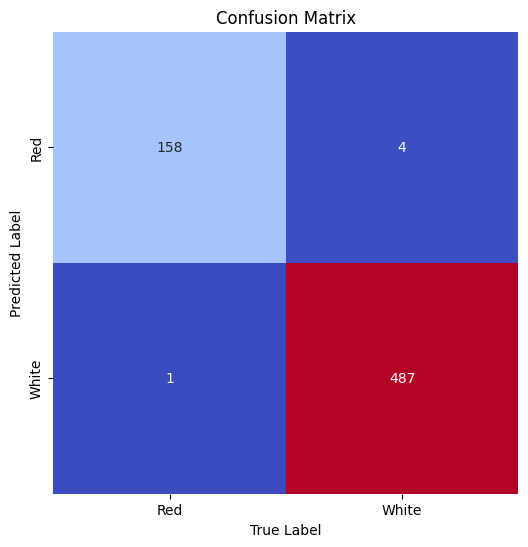

In [ ]:

#predicted probabilities
y_preds3 = model3.predict(X_test)

# Reshape for  y_test
y_preds3 = np.squeeze(y_preds3)
y_preds3 = np.round(y_preds3).astype(int)  # Round probabilities to 0 or 1


confusion_matrix = np.zeros((2, 2))
for pred, true in zip(y_preds3, y_test):
    confusion_matrix[pred][true] += 1



plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.xticks([0.5, 1.5], labels=['Red', 'White'])
plt.yticks([0.5, 1.5], labels=['Red', 'White'])
plt.show()

In [ ]:
#model 4
model4 = Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model4.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model4.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
163/163 [==============================] - 2s 5ms/step - loss: 0.3571 - accuracy: 0.8251 - val_loss: 0.0825 - val_accuracy: 0.9815
Epoch 2/80
163/163 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9811 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 3/80
163/163 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9865 - val_loss: 0.0345 - val_accuracy: 0.9908
Epoch 4/80
163/163 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9873 - val_loss: 0.0288 - val_accuracy: 0.9923
Epoch 5/80
163/163 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9904 - val_loss: 0.0330 - val_accuracy: 0.9908
Epoch 6/80
163/163 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9910 - val_loss: 0.0269 - val_accuracy: 0.9908
Epoch 7/80
163/163 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9923 - val_loss: 0.0309 - val_accuracy: 0.9908
Epoch 

In [ ]:
y_preds4 = model4.predict(X_test)


21/21 [==============================] - 0s 2ms/step


In [ ]:
corr = 0
model_accuracy[3]=0
for i in range(len(y_test)):
  pred = 1 if y_preds4[i] >= 0.5 else 0

  if pred == y_test.iloc[i]:
    corr += 1

model_accuracy[3]=corr / len(y_test)
print(model_accuracy[3])

0.9969230769230769


21/21 [==============================] - 0s 4ms/step


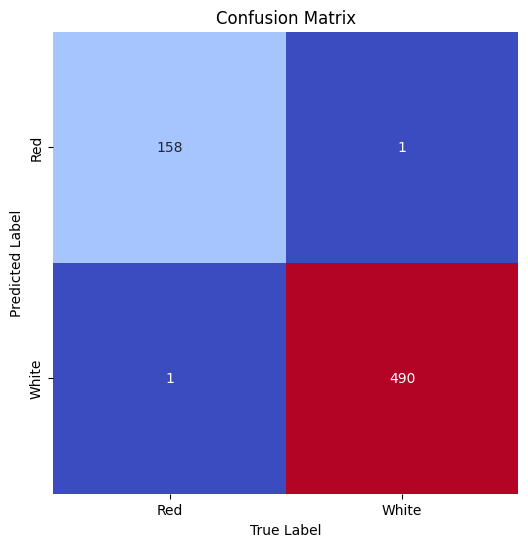

In [ ]:


y_preds4 = model4.predict(X_test)

y_preds4 = np.squeeze(y_preds4)
y_preds4 = np.round(y_preds4).astype(int)

confusion_matrix = np.zeros((2, 2))
for pred, true in zip(y_preds4, y_test):
    confusion_matrix[pred][true] += 1

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.xticks([0.5, 1.5], labels=['Red', 'White'])
plt.yticks([0.5, 1.5], labels=['Red', 'White'])
plt.show()

In [ ]:
#model 5
model5 = Sequential([
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),

])

In [ ]:
model5.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model5.fit(X_train, y_train, epochs=120, validation_data=(X_valid, y_valid))

Epoch 1/120
163/163 [==============================] - 3s 3ms/step - loss: 0.5276 - accuracy: 0.7056 - val_loss: 0.3081 - val_accuracy: 0.8862
Epoch 2/120
163/163 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9621 - val_loss: 0.0899 - val_accuracy: 0.9908
Epoch 3/120
163/163 [==============================] - 0s 2ms/step - loss: 0.0812 - accuracy: 0.9811 - val_loss: 0.0532 - val_accuracy: 0.9908
Epoch 4/120
163/163 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9833 - val_loss: 0.0407 - val_accuracy: 0.9938
Epoch 5/120
163/163 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9850 - val_loss: 0.0336 - val_accuracy: 0.9938
Epoch 6/120
163/163 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9863 - val_loss: 0.0293 - val_accuracy: 0.9954
Epoch 7/120
163/163 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9871 - val_loss: 0.0293 - val_accuracy: 0.9938

In [ ]:
y_preds5 = model5.predict(X_test)


21/21 [==============================] - 0s 2ms/step


In [ ]:
corr = 0
model_accuracy[4]=0
for i in range(len(y_test)):
  pred = 1 if y_preds5[i] >= 0.5 else 0

  if pred == y_test.iloc[i]:
    corr += 1

model_accuracy[4]=corr / len(y_test)
print(model_accuracy[4])

0.9938461538461538


21/21 [==============================] - 0s 2ms/step


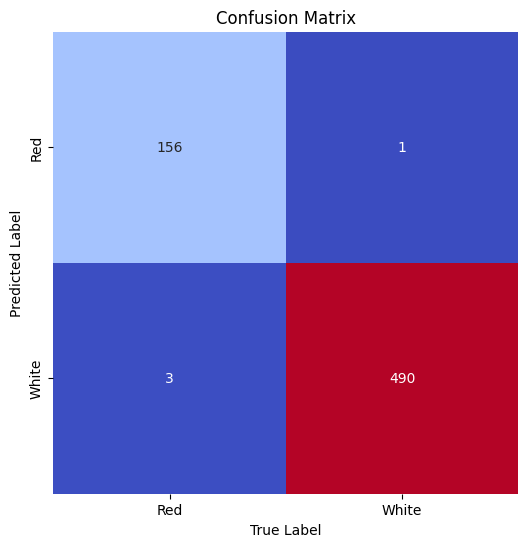

In [ ]:

y_preds5 = model5.predict(X_test)

y_preds5 = np.squeeze(y_preds5)
y_preds5 = np.round(y_preds5).astype(int)


confusion_matrix = np.zeros((2, 2))
for pred, true in zip(y_preds5, y_test):
    confusion_matrix[pred][true] += 1


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.xticks([0.5, 1.5], labels=['Red', 'White'])
plt.yticks([0.5, 1.5], labels=['Red', 'White'])
plt.show()

{0: 0.9892307692307692, 1: 0.9923076923076923, 2: 0.9923076923076923, 3: 0.9969230769230769, 4: 0.9938461538461538}


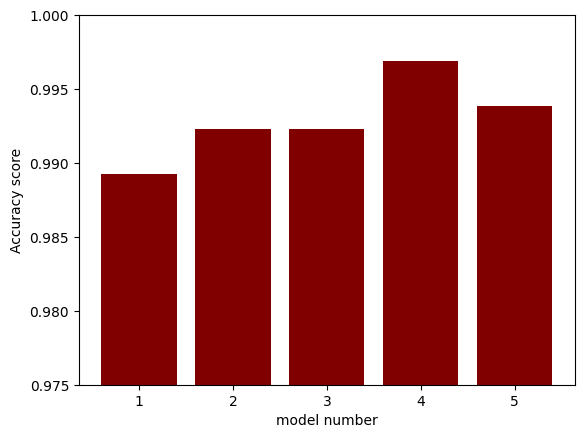

In [ ]:
import matplotlib.pyplot as plt
serial=[1,2,3,4,5]
print(model_accuracy)
score=list(model_accuracy.values())
plt.bar(serial, score, color ='maroon')
plt.ylim(0.975, 1.00)

plt.xlabel("model number")
plt.ylabel("Accuracy score")
plt.show()


Here, model 4 performs the best. So, we choose it for hyperparameter tuning

In [ ]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 11.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define the hyperparameters for the best model
lr = 0.001
bs = 32
epochs = 150

inputs = Input(shape=(X_train.shape[1],))
hidden1 = Dense(128, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
outputs = Dense(1, activation='sigmoid')(hidden3)
best_model = Model(inputs=inputs, outputs=outputs)

best_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])


best_model.fit(X_train, y_train, epochs=epochs, batch_size=bs, verbose=0)

val_predictions = best_model.predict(X_valid)
val_mse = mean_squared_error(y_valid, val_predictions)
val_r2 = r2_score(y_valid, val_predictions)

test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Validation MSE:", val_mse)
print("Validation R-squared Score:", val_r2)
print("Testing MSE:", test_mse)
print("Testing R-squared Score:", test_r2)

21/21 [==============================] - 0s 1ms/step
Validation MSE: 0.0035722841366678765
Validation R-squared Score: 0.9800611650847841
Testing MSE: 0.004615164453119059
Testing R-squared Score: 0.9750232873298902
